#  Grafos y redes de transporte

# Clase 4

##  Parte 1. NetworkX I
### Elementos iniciales 

#### Algunos conceptos básicos

A modo de inicio, cabe aclarar que no siempre existe una forma única de representar una red. Mientras esta refiere al funcionamiento de un sistema complejo, un `grafo` es la representación matemática de dicha red de relaciones. En ese sentido, contamos con infinidades de esquemas. Dentro de ellos las redes de transporte son uno más, donde generalmente las estaciones se representan por medio de nodos o vértices, y las relaciones entre ellos a través de calles o viajes. De tal manera, un grafo se compone por: 

<img align="center" width="500" height="50" src="../imagenes/nodos_ejes.png" style="float: center; padding: 0 15px">

In [ ]:
#!pip install networkx

Para estar al tanto de la última versión disponible siempre es recomendable chequear en el [repositorio oficial](https://github.com/networkx/networkx). También dejamos el link a la [documentación](https://networkx.org/documentation/stable//reference/introduction.html) de la librería.

In [1]:
# última release
!pip show networkx | grep Version

Version: 2.5


## Sección 1: Amrando nuestro grafo

Comencemos por armar un grafo no dirigido, distinguiendo nodos y ejes.

In [2]:
# importar libreria
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# creamos un grafo no dirigido
G = nx.Graph()

In [4]:
# armamos una lista con los que serán nuestros nodos
nodos = list(range(9))

In [5]:
# y la usamos para agregarlos a nuestro objeto de tipo Graph
G.add_nodes_from(nodos)

Como vimos, este objeto se crea cuando instanciamos la clase Graph. Tanto los nodos como los ejes son atributos de este tipo de objetos. Veamos cómo se puede acceder a los mismos.

In [6]:
# los nodos son un atributo de los grafos. Nosotros creamos 5 en total
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

Ahora definamos las conexiones de nuestro grafo. Es decir, los ejes. Como dijimos no existe una única manera de representar una red. Y si bien las de transporte suelen seguir una misma estrructura de nodos y ejes, las conexiones entre los primeros sí pueden ser algo más aleatorio.

In [7]:
print('Conectado nodos:')
print('***************')
for n in range(0, len(nodos),3):
    print(n, '-', n+1)
    G.add_edge(n, n+1)
    
    print(n+1, '-', n+2)
    G.add_edge(n+1, n+2)

Conectado nodos:
***************
0 - 1
1 - 2
3 - 4
4 - 5
6 - 7
7 - 8


In [8]:
# y los devolvemos como una lista de tuplas. Cada una, con los nodos que conecta el eje
G.edges()

EdgeView([(0, 1), (1, 2), (3, 4), (4, 5), (6, 7), (7, 8)])

Usemos el método `draw` de NetworkX para previsualizar cómo se vería esta red de relaciones

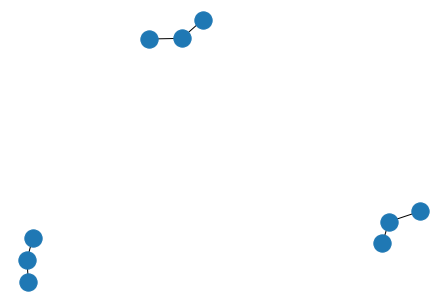

In [9]:
nx.draw(G)

Vale aclarar que todavía no exploramos ninguno de los parametros de `draw`. Tampoco agregamos la noción de espacialidad a nuestro grafo, con lo cual, al no fijar la posición de los nodos este método asigna aleatoriamente su ubicación cada vez que lo ejecutamos:

In [10]:
# conectemos ahora los segmentos inconexos para conformar toda la red
G.add_edge(2,5)
G.add_edge(7,5)

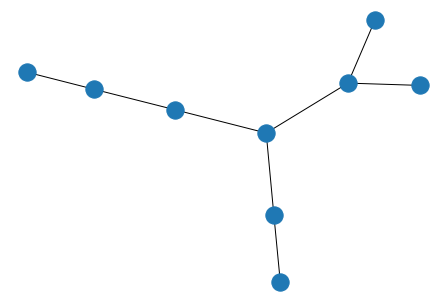

In [11]:
nx.draw(G)

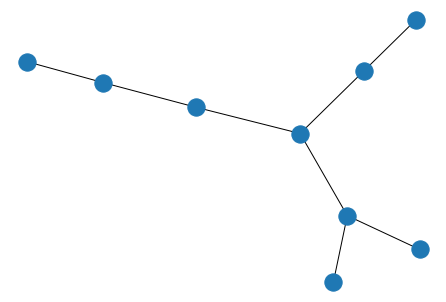

In [12]:
# vemos que las relaciones se mantienen, pero la forma del grafo cambia
nx.draw(G)

A no preocuparse, a lo largo de este notebook iremos viendo cuáles son las posibilidades que nos brinda este método para poder customizar nuestro grafo. Prosigamos...

### 1. 1. Nodos o vértices

Como dijimos, uno de los componentes principales de un grafo son sus nodos. Ya sabemos que con el método `add_nodes_from` podemos incluirlos en nuestro objeto de tipo Graph. Ahora veamos qué tipo de operaciones podemos hacer sobre los mismos. 

Veremos que los nodos se vuelven accesibles, como cualquier iterable, a través de un índice. Una vez allí, podemos decidir qué tipo de atributo agregarle con una etiqueta. Tal como si fueran diccionarios.

In [13]:
# agregamos al nodo 1 una label que vamos a definir con un nombre, suponiendo que fuese una estación.
G.nodes[0]['estacion'] = 'CALLAO'

# también podemos agregar la línea
G.nodes[0]['linea'] = 'B'

# Algún color para identificar
G.nodes[0]['color'] = 'red'

# y por qué no sus coordenadas
G.nodes[0]['coord'] = (-58.39241446187341, -34.603705218144896)

Como se puede apreciar, agregamos una etiqueta a uno de nuestros nodos. De esta manera, podemos obtener una lista de nodos con la metadata asociada. Si prestamos atención, el parámetro `data` nos devuelve un diccionario donde la key es el nodo. Despues contamos con la metadata en otro diccionario donde la llave es la etiqueta y la key el valor. 

Ahora sólo contamos con una descripción a modo de ejemplo, pero imaginen que dicho valor podría ser la cantidad de pasajeros arrivados a una estación a una hora determinada, o el promedio de tiempo entre una estación y otra.

In [14]:
# Veamos el parametro data
G.nodes(data=True)

NodeDataView({0: {'estacion': 'CALLAO', 'linea': 'B', 'color': 'red', 'coord': (-58.39241446187341, -34.603705218144896)}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}})

In [15]:
# y accedamos a su metadata con el posicional de la tupla donde se encuentra el nodo y el diccionario
list(G.nodes(data=True))[0][1]

{'estacion': 'CALLAO',
 'linea': 'B',
 'color': 'red',
 'coord': (-58.39241446187341, -34.603705218144896)}

Completemos nuestra red con la metadata de los demás nodos ...

In [16]:
import pandas as pd

In [17]:
def atributos_para_nodos():
    
    # cargamos el dataframe y lo filtramos con nuestros nodos
    subte = pd.read_csv('https://storage.googleapis.com/python_mdg/data_cursos/estaciones-de-subte.csv')
    lineas = subte[subte.linea.isin(['C','B','D'])]
    
    estaciones = lineas[lineas.estacion.isin(['URUGUAY', 'C. PELLEGRINI',
                                              '9 DE JULIO', 'CALLAO',  'TRIBUNALES - TEATRO COLÓN', 
                                              'AV. DE MAYO', 'DIAGONAL NORTE', 'LAVALLE'])].copy()
    
    # agrupamos las coordenadas
    estaciones['coord'] = list(zip(estaciones.long, estaciones.lat))
    
    # restablecemos el orden en función de cómo contectamos los nodos de nuestro graFo
    estaciones = estaciones.sort_values(by=['linea','id'], ascending=False)
    estaciones_reorder = []
    for l in ['B','D','C']:
        estaciones_reorder.append(estaciones[estaciones.linea==l])
        
    estaciones = pd.concat(estaciones_reorder).reset_index().drop(columns='index')
    
    # ahora asociacmos cada estación a los nodos del grafo
    estaciones['node_idx'] = list(range(1, len(estaciones)+1))
    
    # creamos el resto de los atributos, reindexamos y borramos las columnas que no nos sirven
    estaciones['color'] = estaciones.linea.replace({'D':'green', 'C':'blue', 'B':'red'})
    estaciones.set_index(estaciones.estacion, inplace=True)
    estaciones.drop(columns=['estacion','id', 'long', 'lat'], inplace=True)
    
    atributos = estaciones.to_dict(orient='index')
    
    return atributos

In [18]:
input_dict = atributos_para_nodos()

In [ ]:
input_dict['9 DE JULIO']

In [ ]:
input_dict

In [ ]:
def define_atributos_nodos(atributos, nombre_estacion):
    # agregamos al nodo 1 una label que vamos a definir con un nombre, suponiendo que fuese una estación.
    G.nodes[atributos[nombre_estacion]['node_idx']]['estacion'] = nombre_estacion

    # también podemos agregar la línea
    G.nodes[atributos[nombre_estacion]['node_idx']]['linea'] = atributos[nombre_estacion]['linea']

    # Algún color para identificar
    G.nodes[atributos[nombre_estacion]['node_idx']]['color'] = atributos[nombre_estacion]['color']

    # y por qué no sus coordenadas
    G.nodes[atributos[nombre_estacion]['node_idx']]['coord'] = atributos[nombre_estacion]['coord']

In [ ]:
for k in input_dict.keys():
    define_atributos_nodos(atributos=input_dict, nombre_estacion=k)

In [ ]:
G.nodes(data=True)

In [ ]:
# accedemos a la metadata del nodo 3 y vemos si se asignó la información que esperabamos
list(G.nodes(data=True))[3][1]

Supongamos ahora que quisieramos quedarnos solamente con aquellos nodos que responden a un atributo en particular. Por ejemplo, pertenecer a una misma línea del subterráneo. Se les ocurre cómo podríamos filtrar elementos dentro de la vista de nodos de un grafo determinado?

In [ ]:
# Una recurso bastante utilizado en este tipo de estructuras son las comprehension lists!
[n for n,d in G.nodes(data=True) if d['linea'] == 'B']

Ya sabemos que los nodos `0`, `1` y `2` pertenecen a la línea `B`.

### 1.2. Ejes o arcos

Como mencionamos, otro de los componentes de un grafo son los ejes. Estos, establecen o determinan si los pares de nodos que conforman nuestro grafo están conectados por algún tipo de relación. De manera similar a como vimos recién, los ejes se vuelven accesibles mediante un indexado. Ahora bien, este no es un valor único sino que considera los extremos del eje. En otras palabras, los nodos que está conectando.

In [ ]:
# Agreguemos ahora un par "key:value" a los ejes. Vean que para acceder se usa una lista con los nodos que unen
G.edges[0,1]['fecha']='2019-10-01'
G.edges[0,1]['hora']='09:30:00'
G.edges[0,1]['pasajeros']=125

In [ ]:
G.edges(data=True)

Así, acabamos de agregar un poco de información adicional a nuestra primera conexión. Los nodos `0` y `1` se conectaban el 10 de enero de 2019 a las 9:30 de la mañana, transportando 125 pasajeros. Esto nos brinda algo de contexto.

Ahora bien, si nos detenemos en este último atributo vamos a incorporar un nuevo concepto: el de peso (o `weight` en inglés). Este sirve para dimensionar la intensidad de una conexión entre pares de nodos dentro de nuestro grafo. Y así como decidimos que sean pasajeros, podríamos haber definido cualquier otro: tiempo transcurrido para llegar de un nodo `u` a otro `v`, velocidad promedio del viaje, etc. etc.

Al igual que con los nodos, agregar atributos a los ejes de un grafo nos permite caracterizar a nuestro grafo. Y también poder seleccionar componentes dentro del mismo siguiendo algún tipo de condición. Veamos cómo hacerlo iterando sobre los ejes de una manera más extendida, pero también más explícita ...

In [ ]:
# para los nodos o vértices (u,v) y el diccionario (d)
for u,v,d in G.edges(data=True):
    
    # revisamos si el nodo 1 se encuentra involucrado:
    if 1 in [u,v]:
        
        # y le cambiamos el valor de su peso
        d['pasajeros'] = 75

Ahora, completemos nuestro grafo sumando atributos al resto de los ejes. Para mantenerlo simple, supongamos que estamos trabajando con una porción de la red de subterráneos para un mismo día y hora.

In [ ]:
import random

In [ ]:
def define_atributos_ejes():
    conexiones_lineas = [(2,5),(5,7)]
    conexiones_estaciones = [i for i in G.edges if i not in conexiones_lineas]
    
    for i in conexiones_estaciones:
        # donde i[0] es el nodo inicial y i[1] el final
        G.edges[i[0], i[1]]['fecha']='2019-10-01'
        G.edges[i[0], i[1]]['hora']='09:30:00'
        G.edges[i[0], i[1]]['pasajeros']=random.randint(10,100)
    
    for i in conexiones_lineas:
        G.edges[i[0], i[1]]['fecha']='2019-10-01'
        G.edges[i[0], i[1]]['hora']='09:30:00'
        G.edges[i[0], i[1]]['pasajeros']=random.randint(100,200)

In [ ]:
# asigamos atributos a los ejes
define_atributos_ejes()

In [ ]:
# y los visualizamos
G.edges(data=True)

In [ ]:
G.edges[6,7]

Por último, veamos cómo funciona el filtrado por listas de comprenión que tambien vimos con los nodos. Fíjense que para iterar sobre los ejes debemos tener en cuenta los nodos que están uniendo. Por eso la iteración es a partir de una tupla de elementos.

In [ ]:
# usamos una lista por comprensión para filtrar las conexiones con más de 75 pasajeros
[(u,v) for u,v,d in G.edges(data=True) if d['pasajeros'] > 75]

### 1.3. Visualizando nuestro grafo

Cuando visualizamos nuestro grafo `G` por primera vez, vimos que la posición de los nodos cambiaba cada vez que instanciábamos el objeto. Eso, porque no habíamos incorporado todavía la noción de espacialidad dentro del grafo. Esto, podemos hacerlo a través del parámetro `position` o `pos`. En el dataframe que usamos para articular los nodos contábamos con las coordenadas, aprovechemos ese atributo para ordenar las estaciones dentro del grafo, tal como si estuviésemos trabajando con la red de subterráneos.

In [ ]:
# el método `get_node_attributes` nos permite capturar los atributos desde un grafo ya instanciado
pos = nx.get_node_attributes(G,'coord')

In [ ]:
# y nos devuelve un diccionario con el idx del nodo y el atributo en cuestión
pos

In [ ]:
# que en nuestro grafo usamos para posicionar los nodos. Agreguemos también algo de color ...
nx.draw(G,pos, with_labels=True, node_color='#00b4d9')

Comparen este grafo con la red de subterráneos de la Ciudad de Buenos Aires. Ya empieza a haber un poco más de similitud no? Agreguemos algunos estilos adicionales para terminar de darle forma ...

In [ ]:
# primero con el nombre de las estaciones
lab = nx.get_node_attributes(G,'estacion')

In [ ]:
nx.draw(G,pos, labels=lab, with_labels=True, node_size=400, node_color='#00b4d9')

Ya con el nombre de las estaciones podemos ver qué es lo que estamos queriendo representar. Un grafo donde las líneas están representadas por estaciones que se unen consecutivamente, pero que a la vez, cuentan con ejes que las conectan entre sí. Evitando que las líneas se encuentren aisladas y que el grafo termine de completarse. Veamos cómo podríamos hacer para asignarle un color a los nodos en función de su pertenencia a cada una de las líneas.

In [ ]:
# podríamos seguir usando el método `get_node_attributes`
color_dict = nx.get_node_attributes(G,'color')

In [ ]:
# lo que hace el camino un poco más largo
colors = []
for n,c in color_dict.items():
    colors.append(c)

In [ ]:
colors

In [ ]:
# o tambien haber usado una comprehension list
colores = [i[1]['color'] for i in G.nodes(data=True)]

In [ ]:
colors

In [ ]:
nx.draw(G,pos, labels=lab, with_labels=True, node_size=400, node_color=colors)

Tanto los colores como los pesos se asignan por medio de listas, respetando el orden de los componentes (nodos o ejes) dentro del grafo. Veamoslo cómo sería aplicado a la medida de peso que agregamos recientemente, la cantidad de pasajeros. Veamos cómo queda.

In [ ]:
# asignamos el color amarillo a las conexiones intensas
ec = ['yellow' if G[u][v]['pasajeros'] > 100 else 'lightgrey' for u,v in G.edges()]

In [ ]:
# y definimos el parametro peso a partir del atributo pasajeros para visualizar
ew = [G[u][v]['pasajeros']/5 for u,v in G.edges()]

In [ ]:
# con el método `subplots` de matplotlib creamos el eje y la figura donde se almacena
fig, ax = plt.subplots(figsize=(17,10))

# dicho eje lo podemos pasar como parámetro al método `draw`
nx.draw(G,pos, labels=lab, with_labels=True, 
        node_size=400, node_color=colors,
        edge_color = ec, width = ew, ax=ax)

# agregamos etiquetas a los ejes
edge_labels = nx.get_edge_attributes(G, 'pasajeros')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

ax.set_title('Cantidad de pasajeros por eje');

También podríamos graduar los ejes con una leyenda que indique la cantidad de pasajeros, en lugar de usar una etiqueta. Esto con el módulo `cm` de matplotlib.

In [ ]:
from matplotlib import cm

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))

ec=[G[u][v]['pasajeros'] for u, v in G.edges]

mcl = nx.draw_networkx_edges(G, pos, edge_cmap=cm.Greys, width=10,edge_color=ec)

nx.draw_networkx_nodes(G, pos, node_size=400, node_color=colors, ax=ax)
nx.draw_networkx_labels(G, pos, labels=lab, font_size=10, 
                        horizontalalignment='right', ax=ax)

plt.colorbar(mcl)
ax.set_axis_off()
ax.set_title('Cantidad de pasajeros por eje');

### 1.2. Tipos de grafos

Otra cuestión relevante a tener en cuenta es que contamos con dos tipos de grafos:

<img align="center" width="700" height="40" src="../imagenes/dir_undir.png" style="float: center; padding: 0 15px">

`NetworkX` es una librería muy útil para operar con este tipo de estructuras. Veamos por qué...

In [ ]:
# Grafo no dirigido
type(G)

In [ ]:
# Grafo dirigido
D = nx.DiGraph()
type(D)

In [ ]:
# Multi-edge (Directed) graphs 
M = nx.MultiGraph()
type(M)

In [ ]:
MD = nx.MultiDiGraph()
type(MD)

### 1. 3. Selfloops

In [ ]:
# Como encontrar self loops?

def find_selfloop_node(G):
    '''
    Finds all nodes that have self-loops in the graph G
    '''
    
    nodes_in_selfloops = []
    
    # Iterar sobre todos los ejes de G
    for u,v in G.edges():
        
        # Chequear si el nodo u y el nodo v son iguales:
        if u == v:
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

In [ ]:
# No hay ningun selfloop
len(find_selfloop_node(G))

In [ ]:
# No devuelve error porque esta ok
assert nx.number_of_selfloops(G) == len(find_selfloop_node(G))

In [ ]:
nx.number_of_selfloops(G)

### 1.4. Matrices de adyacencia

In [ ]:
# Convertimos a G en una matriz (1 indica si hay edge entre nodos)
A = nx.to_numpy_matrix(G)

In [ ]:
A

In [ ]:
# Convertimos a G de nuevo al formtato NetworkX como un grafo dirigido: A_conv
A_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

In [ ]:
# Check that the `category` metadata field is lost from each node
for n, d in A_conv.nodes(data=True):
    assert 'category' not in d.keys()

In [ ]:
Ac = nv.MatrixPlot(A_conv)
Ac.draw()
plt.show()

## Sección 2: Métricas de un grafo

### 2.1. Degree centrality

In [ ]:
# Degree centrality: la cantidad de vecinos que tengo sobre la cantidad que podria tener
G.edges()

In [ ]:
# devuelve los nodos vecinos del especificado en el metodo
list(G.neighbors(2))

In [ ]:
# The key is the node and the value the centrality value
nx.degree_centrality(G)

In [ ]:
# Funcion para obtener nodos segun la cantidad de vecinos
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(G, 1)
print(six_nbrs)

In [ ]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Print the degrees
print(degrees)

In [ ]:
# Devuelve un diccionario donde la key es el nodo y el valor es el degree centrality (Neighbors/possible neighbors). En una red de transporte el nodo mismo es considerado como un self loop que entra en los nodos posibles
deg_cent = nx.degree_centrality(G)

In [ ]:
# Devuelve un histograma con la distribucion del degree centrality
plt.hist(list(deg_cent.values()));

In [ ]:
# Plot a histogram of the degree distribution of the graph
plt.hist([len(list(G.neighbors(n))) for n in G.nodes()])

In [ ]:
# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(x=degrees, y=list(deg_cent.values()))
plt.show()

In [ ]:
G.nodes()

In [ ]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])
            print('Path doesn\'t exists between nodes {0} and {1}'.format(node1, node2))
            return visited_nodes
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False


In [ ]:
print(path_exists(G,3,1))

### 2.2. Degree + Betweenes centrality

In [ ]:
# Betweeness centrality
# M1 es el numero de nodos en el extremo final y m2 la cantidad de nodos en el puente entre ambos
G = nx.barbell_graph(m1=5, m2=1)

# La key es el nodo y el valr es el betweenness centrality
nx.betweenness_centrality(G)

In [ ]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(x=list(bet_cen.values()), y=list(deg_cen.values()))

# Display the plot
plt.show()

In [ ]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in G: top_dc
top_dc = find_nodes_with_highest_deg_cent(G)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(G)[node] == max(nx.degree_centrality(G).values())

#### CON ESTA FUNCION SE PODRIA ENCONTAR EL NODO CON MAYOR BETWEENNESS CENTARLITY EN TODA LA RED DE BICIS

In [ ]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(G)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(G)[node] == max(nx.betweenness_centrality(G).values())

# PATH FINDING

## Triangulos 

In [ ]:
from itertools import combinations

In [ ]:
# Iterar sobre every pair of nodes and not only every edge
for n1, n2 in combinations(G.nodes(),2):
    print(n1,n2)

In [ ]:
# Define is_in_triangle(): podria servir para encontrar cliques entre las estaciones
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1,n2):
            in_triangle = True
            break
    return in_triangle

In [ ]:
is_in_triangle(G,2)

In [ ]:
#Finding nodes involved in triangles

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1,n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(G, 1)) == 5

In [ ]:
#Finding open triangles

# Define node_in_open_triangle(G,n)
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in G.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G,n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

## Cliques y maximal cliques 

In [ ]:
# Finding maximal cliques
Z = nx.barbell_graph(m1=5, m2=1)

nx.find_cliques(Z)

# Lista con los maximal cliques
list(nx.find_cliques(Z))

In [ ]:
nx.find_cliques(Z)

In [ ]:
#Finding all maximal cliques of size "n"

# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(Z, 3)) == 33


In [ ]:
# En el grafo Z hay dos maximal cliques de 5 nodos
maximal_cliques(Z, 5)

## Subgraphs: analizar subsets de nodos 

In [ ]:
# n es la cantidad de nodos y p la probabilidad que exista un eje entre un par de nodos
E = nx.erdos_renyi_graph(n=20, p=0.2)

In [ ]:
nx.draw(E)

In [ ]:
# Genera un grafo de manera probabilistica. En el caso anterior, 20 nodos con 37 edges
list(E.nodes())

In [ ]:
# Vamos a plotear el nodo 8 y sus vecinos

# Definimos los vecinos del nodo 8
nodes = list(E.neighbors(8))

# se agregan el nodo 8 a la lista con sus vecinos
nodes.append(8)

In [ ]:
# Almacenamos la lista conteniendo el nodo 8 con sus vecinos en un subgrafo
E_ocho = E.subgraph(nodes)

# Vemos sus ejes: tambien devuelve los ejes que tienen los vecinos de 8 (con otros nodos distintos)
E_ocho.edges()

In [ ]:
# Ambos grafos tienen el mismo datatype
E

In [ ]:
E_ocho

In [ ]:
# ploteamos el subgrafo: se le pasa el grafo como objeto
nx.draw(E_ocho, with_labels=True)